# **Projeto IA N2**


#**Integrantes:**

##Caio Ribeiro - 10401002
##Vinícius Magno – 10401365  

# Metodologia Abordada:

Neste trabalho, utilizamos dois datasets contendo informações sobre desempenho acadêmico, comportamento, hábitos de estudo e bem-estar dos estudantes. O processo foi dividido em quatro etapas principais:

Primeiro, realizamos a limpeza dos dados, removendo duplicatas, colunas irrelevantes e tratando valores ausentes com a média para variáveis numéricas e moda para categóricas.

Em seguida, aplicamos uma análise exploratória (EDA) para entender os dados, utilizando estatísticas descritivas, histogramas, boxplots e matrizes de correlação, a fim de observar padrões, identificar outliers e relações entre variáveis.

Na terceira etapa, aplicamos o algoritmo de clusterização K-Means, que agrupou os estudantes em perfis com características semelhantes. A escolha do número de clusters foi feita utilizando o método do cotovelo e validada pelo Silhouette Score.

Por fim, as características médias de cada grupo foram resumidas em um dicionário e utilizadas como entrada para uma IA generativa, que gerou textos descritivos dos perfis encontrados, facilitando a interpretação dos resultados.

Todas as etapas foram implementadas em Python, utilizando bibliotecas como Pandas, NumPy, Seaborn, Matplotlib e Scikit-Learn.


## 1. Importação das Bibliotecas

In [20]:
# 1. Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Visualização mais limpa
%matplotlib inline
sns.set(style='whitegrid')

# Verificação de existência dos arquivos
# Para usar no Colab basta apenas subir os arquivos. Em demais IDEs, deve especificar o caminho.
path_df1 = 'Students_Grading_Dataset.csv'
path_df2 = 'student_performance_large_dataset.csv'

if os.path.exists(path_df1) and os.path.exists(path_df2):
    print("✅ Ambos os arquivos foram encontrados com sucesso.")
else:
    if not os.path.exists(path_df1):
        print("Arquivo 1 não encontrado:", path_df1)
    if not os.path.exists(path_df2):
        print("Arquivo 2 não encontrado:", path_df2)


✅ Ambos os arquivos foram encontrados com sucesso.


## 2. Carregamento dos Dados
Primeiro carregamos ambos os datasets.

In [23]:
# Para usar no Colab basta apenas subir os arquivos. Em demais IDEs, deve especificar o caminho.
path_df1 = 'Students_Grading_Dataset.csv'
path_df2 = 'student_performance_large_dataset.csv'

# Leitura dos arquivos CSV
df1 = pd.read_csv(path_df1)
df2 = pd.read_csv(path_df2)

# Exibição de amostra dos dados
print("----- Dataset 1: Students_Grading_Dataset.csv -----")
display(df1.head())

print("\n----- Dataset 2: student_performance_large_dataset.csv -----")
display(df2.head())


----- Dataset 1: Students_Grading_Dataset.csv -----


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1



----- Dataset 2: student_performance_large_dataset.csv -----


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


## 3. Inspeção Inicial
Nesta etapa, vamos fazer uma leitura inicial de ambos os datasets para entender melhor sua estrutura.

Obervamos as primeiras linhas, o tipo de dados em cada coluna, e gerar estatísticas descritivas gerais.
Isso vai ajudar a ter uma visão geral do conteúdo e a detectar possíveis problemas logo no começo.


In [24]:
# Exibe as primeiras linhas do Dataset 1 para ter uma visão geral dos dados
print("Dataset 1: Students_Grading_Dataset.csv")
print("\nPrimeiras linhas:")
display(df1.head())

# Mostra a estrutura do Dataset 1 (nomes das colunas, tipos de dados, valores não nulos)
print("\nEstrutura e tipos de dados:")
df1.info()

# Gera estatísticas descritivas para todas as colunas (inclusive categóricas)
print("\nEstatísticas descritivas:")
display(df1.describe(include='all'))

# Exibe as primeiras linhas do Dataset 2
print("\n\nDataset 2: student_performance_large_dataset.csv")
print("\nPrimeiras linhas:")
display(df2.head())

# Mostra a estrutura do Dataset 2
print("\nEstrutura e tipos de dados:")
df2.info()

# Estatísticas descritivas para o Dataset 2
print("\nEstatísticas descritivas:")
display(df2.describe(include='all'))


Dataset 1: Students_Grading_Dataset.csv

Primeiras linhas:


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1



Estrutura e tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Proj

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000,5000,5000,5000,5000,5000.000000,5000,4484.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000,5000.000000,5000,5000,3206,5000,5000.00000,5000.000000
unique,5000,8,6,5000,2,NaN,4,NaN,NaN,NaN,...,NaN,NaN,5,NaN,2,2,4,3,NaN,NaN
top,S5999,Maria,Johnson,student4999@university.com,Male,NaN,CS,NaN,NaN,NaN,...,NaN,NaN,A,NaN,No,Yes,PhD,Low,NaN,NaN
freq,1,657,868,1,2551,NaN,2022,NaN,NaN,NaN,...,NaN,NaN,1495,NaN,3493,4485,820,1983,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,21.048400,NaN,75.431409,70.326844,69.640788,...,74.924860,75.121804,NaN,17.658860,NaN,NaN,NaN,NaN,5.48080,6.488140
std,NaN,NaN,NaN,NaN,NaN,1.989786,NaN,14.372446,17.213209,17.238744,...,14.423415,14.399941,NaN,7.275864,NaN,NaN,NaN,NaN,2.86155,1.452283
min,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,50.010000,40.000000,40.000000,...,50.010000,50.020000,NaN,5.000000,NaN,NaN,NaN,NaN,1.00000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,63.265000,55.457500,54.667500,...,62.320000,62.835000,NaN,11.400000,NaN,NaN,NaN,NaN,3.00000,5.200000
50%,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,75.725000,70.510000,69.735000,...,74.980000,75.395000,NaN,17.500000,NaN,NaN,NaN,NaN,5.00000,6.500000
75%,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,87.472500,84.970000,84.500000,...,87.367500,87.652500,NaN,24.100000,NaN,NaN,NaN,NaN,8.00000,7.700000




Dataset 2: student_performance_large_dataset.csv

Primeiras linhas:


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C



Estrutura e tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech       

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
count,10000,10000.000000,10000,10000.000000,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000
unique,10000,NaN,3,NaN,4,NaN,2,NaN,NaN,NaN,2,3,NaN,NaN,4
top,S09984,NaN,Female,NaN,Visual,NaN,Yes,NaN,NaN,NaN,Yes,Medium,NaN,NaN,A
freq,1,NaN,4846,NaN,2523,NaN,5996,NaN,NaN,NaN,7022,5015,NaN,NaN,2678
mean,NaN,23.478800,NaN,27.130300,NaN,10.007900,NaN,74.922000,70.188900,75.085100,NaN,NaN,14.936500,6.979300,NaN
std,NaN,3.461986,NaN,13.002547,NaN,6.136726,NaN,14.675437,17.649447,14.749251,NaN,NaN,9.022639,1.996965,NaN
min,NaN,18.000000,NaN,5.000000,NaN,0.000000,NaN,50.000000,40.000000,50.000000,NaN,NaN,0.000000,4.000000,NaN
25%,NaN,20.000000,NaN,16.000000,NaN,5.000000,NaN,62.000000,55.000000,62.000000,NaN,NaN,7.000000,5.000000,NaN
50%,NaN,23.000000,NaN,27.000000,NaN,10.000000,NaN,75.000000,70.000000,75.000000,NaN,NaN,15.000000,7.000000,NaN
75%,NaN,27.000000,NaN,38.000000,NaN,15.000000,NaN,88.000000,85.000000,88.000000,NaN,NaN,23.000000,9.000000,NaN


## 4. Tratamento dos Dados

### 4.1 Remoção de Duplicados

In [25]:
# Remove linhas duplicadas do Dataset 1, se existirem
df1 = df1.drop_duplicates()

# Remove linhas duplicadas do Dataset 2, se existirem
df2 = df2.drop_duplicates()


### 4.2 Preenchimento de Valores Ausentes

- Para colunas numéricas: preenche com a média
- Para colunas categóricas: preenche com a moda (valor mais frequente)
- Se não houver moda disponível, preenche com 'Desconhecido'

In [26]:
def fill_missing(df):
    for col in df.columns:
        if df[col].dtype in [np.float64, np.int64]:
            df[col] = df[col].fillna(df[col].mean())
        else:
            if not df[col].mode().empty:
                df[col] = df[col].fillna(df[col].mode()[0])
            else:
                df[col] = df[col].fillna('Desconhecido')
    return df

# Aplica o tratamento de valores ausentes em ambos os datasets
df1 = fill_missing(df1)
df2 = fill_missing(df2)

# Exibe a quantidade de valores ausentes restantes para o Dataset 1
print("=== Valores ausentes em Dataset 1 ===")
print(df1.isnull().sum())

# Exibe a quantidade de valores ausentes restantes para o Dataset 2
print("\n=== Valores ausentes em Dataset 2 ===")
print(df2.isnull().sum())


=== Valores ausentes em Dataset 1 ===
Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

=== Valores ausentes em Dataset 2 ===
Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                   

### 4.3 Ajuste de Tipos e Verificação de Consistência
Converte colunas para tipos numéricos e verifica inconsistências (ex.: idades negativas, horas de estudo absurdas).

In [27]:
def ajustar_tipos_df1(df):
    # Lista de colunas numéricas esperadas para o Dataset 1
    cols_numericas = [
        'Age',
        'Attendance (%)',
        'Midterm_Score',
        'Final_Score',
        'Assignments_Avg',
        'Quizzes_Avg',
        'Participation_Score',
        'Projects_Score',
        'Total_Score',
        'Study_Hours_per_Week',
        'Stress_Level (1-10)',
        'Sleep_Hours_per_Night'
    ]

    # Verifica quais colunas existem e quais estão faltando
    cols_existentes = [col for col in cols_numericas if col in df.columns]
    cols_faltantes = [col for col in cols_numericas if col not in df.columns]
    if cols_faltantes:
        print("Dataset 1 - Colunas faltantes:", cols_faltantes)

    # Converte as colunas existentes para numérico, tratando erros
    for col in cols_existentes:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Checagens de consistência
    if 'Age' in df.columns and df['Age'].min() <= 0:
        print("Atenção: Idade(s) <= 0 encontradas no Dataset 1.")
    if 'Study_Hours_per_Week' in df.columns and df['Study_Hours_per_Week'].max() > 168:
        print("Atenção: Horas de estudo por semana acima do esperado no Dataset 1.")

    print("Dataset 1 - Tipos ajustados e estatísticas básicas:")
    print(df[cols_existentes].dtypes)
    print(df[cols_existentes].describe())
    return df

def ajustar_tipos_df2(df):
    # Lista de colunas numéricas esperadas para o Dataset 2
    cols_numericas = [
        'Age',
        'Attendance (%)',
        'Midterm_Score',
        'Final_Score',
        'Assignments_Avg',
        'Quizzes_Avg',
        'Participation_Score',
        'Projects_Score',
        'Total_Score',
        'Study_Hours_per_Week',
        'Stress_Level (1-10)',
        'Sleep_Hours_per_Night'
    ]

    # Verifica quais colunas existem e quais estão faltando
    cols_existentes = [col for col in cols_numericas if col in df.columns]
    cols_faltantes = [col for col in cols_numericas if col not in df.columns]
    if cols_faltantes:
        print("Dataset 2 - Colunas faltantes:", cols_faltantes)

    # Converte as colunas existentes para numérico, tratando erros
    for col in cols_existentes:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Checagens de consistência
    if 'Age' in df.columns and df['Age'].min() <= 0:
        print("Atenção: Idade(s) <= 0 encontradas no Dataset 2.")
    if 'Attendance (%)' in df.columns and df['Attendance (%)'].max() > 100:
        print("Atenção: Valores de Attendance (%) acima de 100 no Dataset 2.")

    print("Dataset 2 - Tipos ajustados e estatísticas básicas:")
    print(df[cols_existentes].dtypes)
    print(df[cols_existentes].describe())
    return df

# Aplica as funções de ajuste aos dois datasets
df1 = ajustar_tipos_df1(df1)
df2 = ajustar_tipos_df2(df2)


Dataset 1 - Tipos ajustados e estatísticas básicas:
Age                        int64
Attendance (%)           float64
Midterm_Score            float64
Final_Score              float64
Assignments_Avg          float64
Quizzes_Avg              float64
Participation_Score      float64
Projects_Score           float64
Total_Score              float64
Study_Hours_per_Week     float64
Stress_Level (1-10)        int64
Sleep_Hours_per_Night    float64
dtype: object
               Age  Attendance (%)  Midterm_Score  Final_Score  \
count  5000.000000     5000.000000    5000.000000  5000.000000   
mean     21.048400       75.431409      70.326844    69.640788   
std       1.989786       13.610481      17.213209    17.238744   
min      18.000000       50.010000      40.000000    40.000000   
25%      19.000000       64.737500      55.457500    54.667500   
50%      21.000000       75.431409      70.510000    69.735000   
75%      23.000000       86.182500      84.970000    84.500000   
max      2

# 5. Análise Exploratória

# 5.1 Matriz de Correlação
Aqui selecionamos as colunas numéricas de cada dataset e calculamos a correlação entre elas.
Em seguida, usamos um heatmap para visualizar essas correlações.

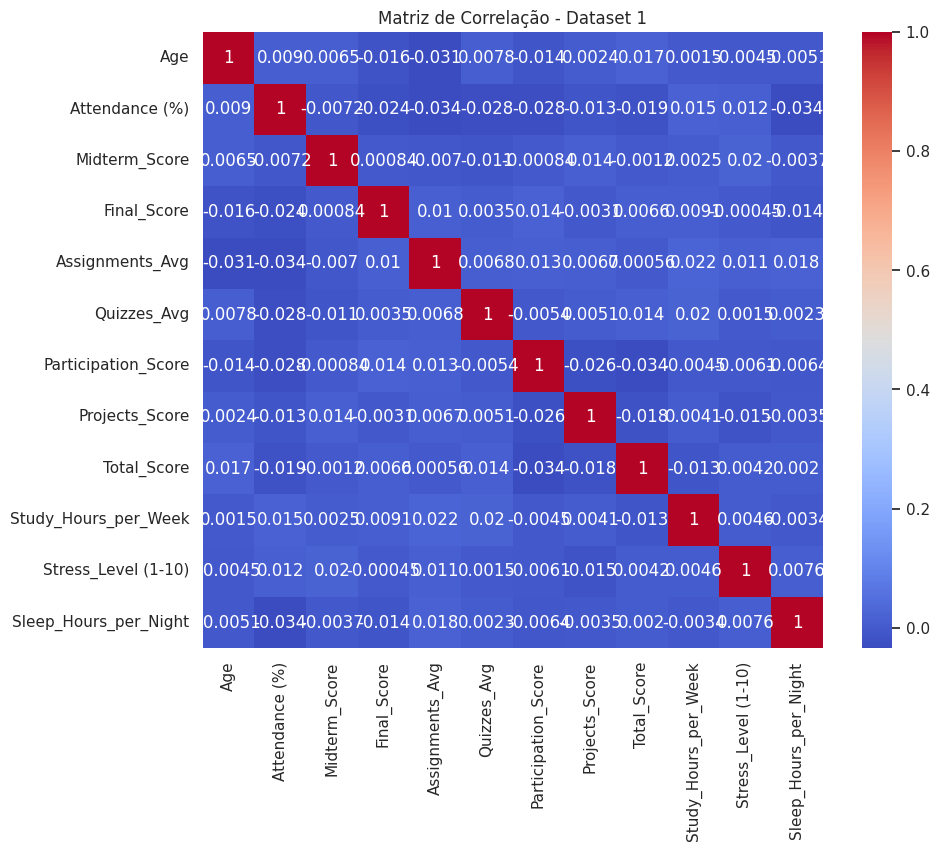

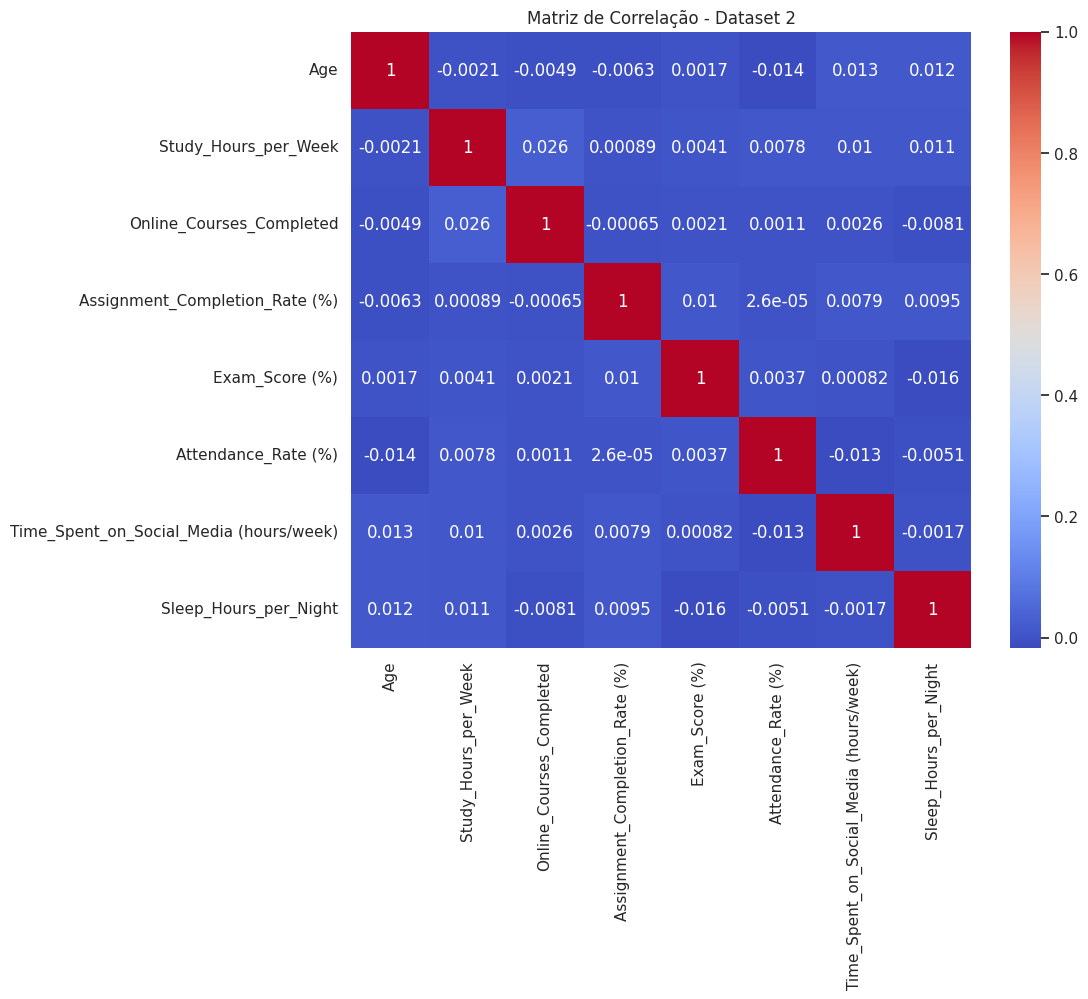

In [28]:
# Matriz de Correlação
corr_df1 = df1.select_dtypes(include=[np.number]).corr()
corr_df2 = df2.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_df1, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação - Dataset 1')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(corr_df2, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação - Dataset 2')
plt.show()

# 5.2 Distribuição das Variáveis Numéricas
Esta função gera histogramas e boxplots para cada coluna numérica,
facilitando a identificação de outliers e o padrão de distribuição dos dados.

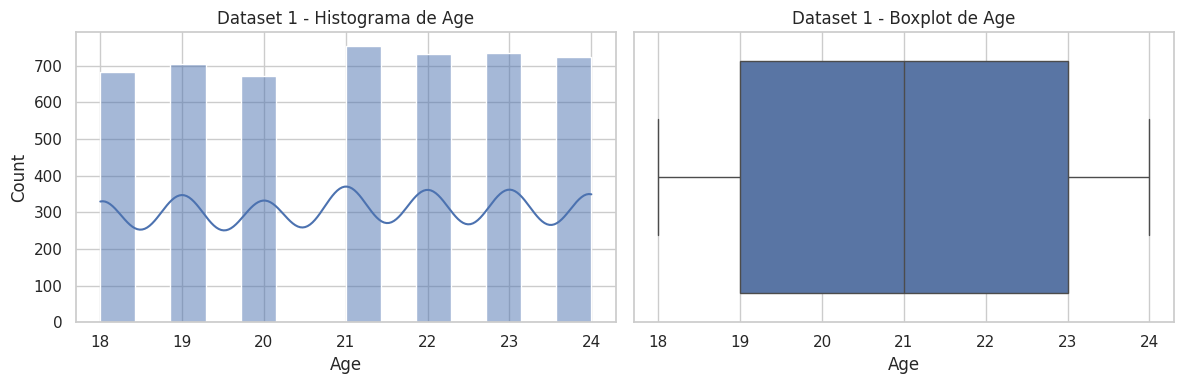

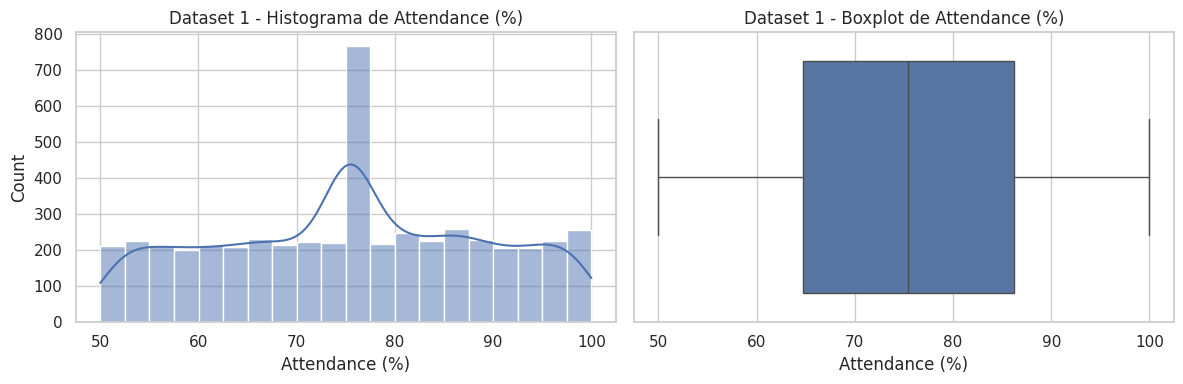

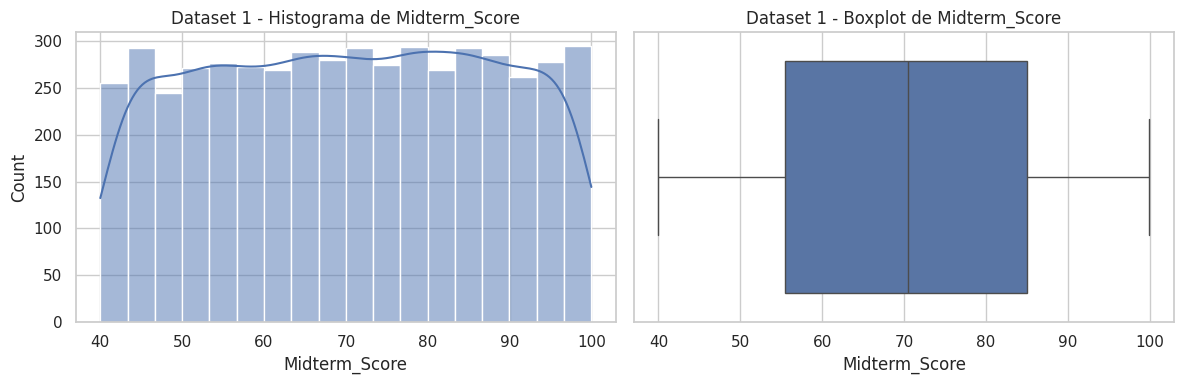

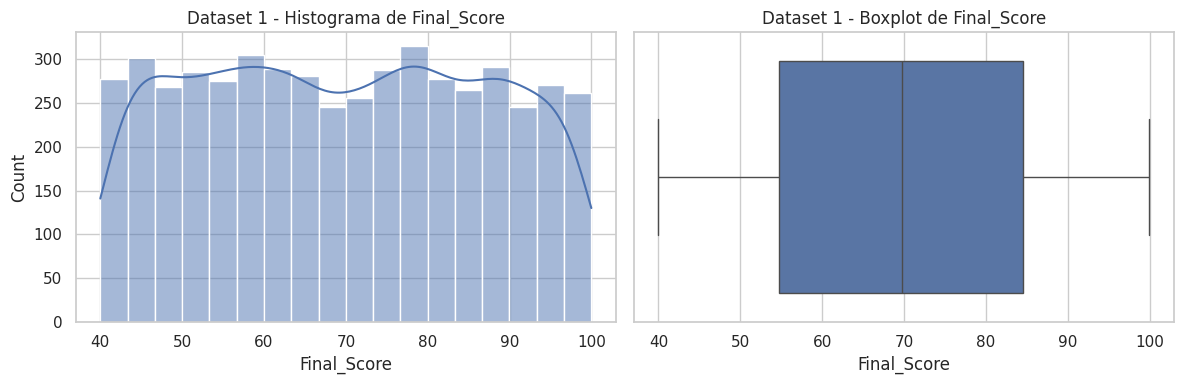

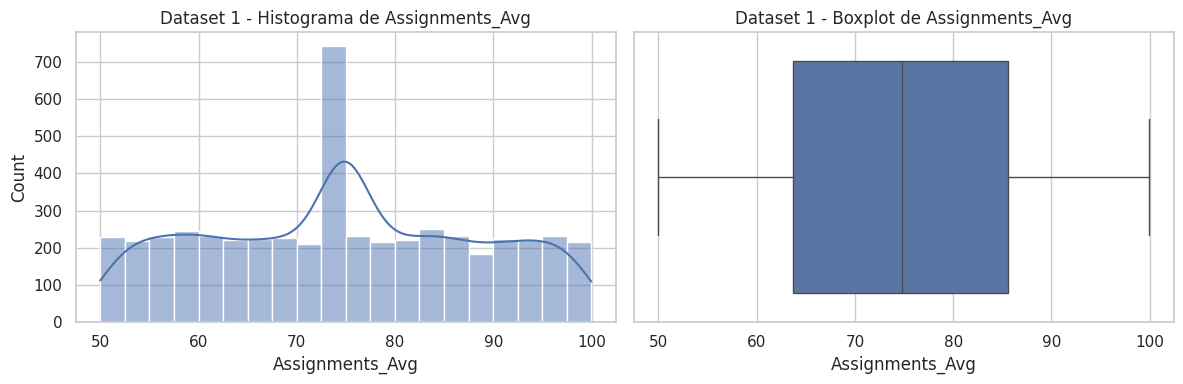

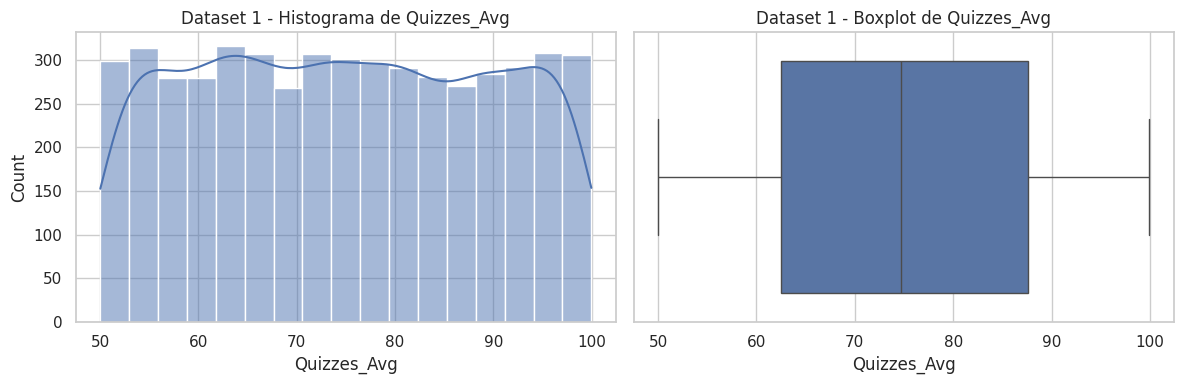

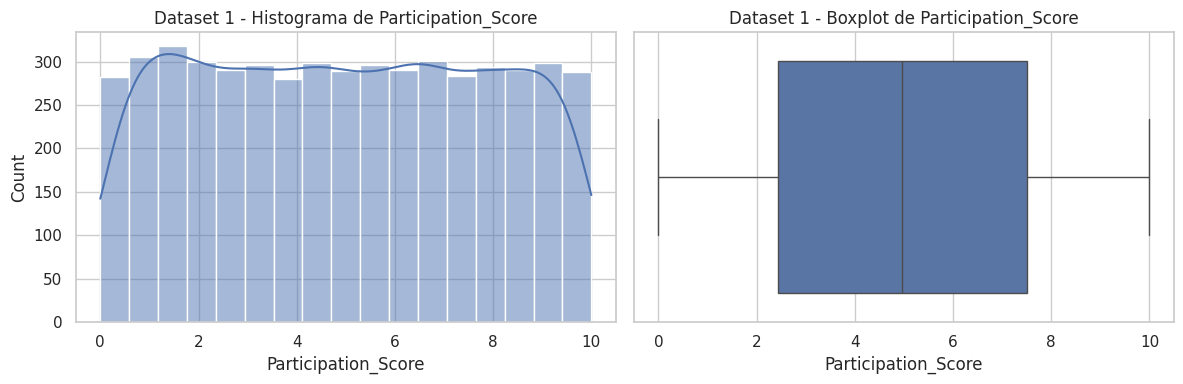

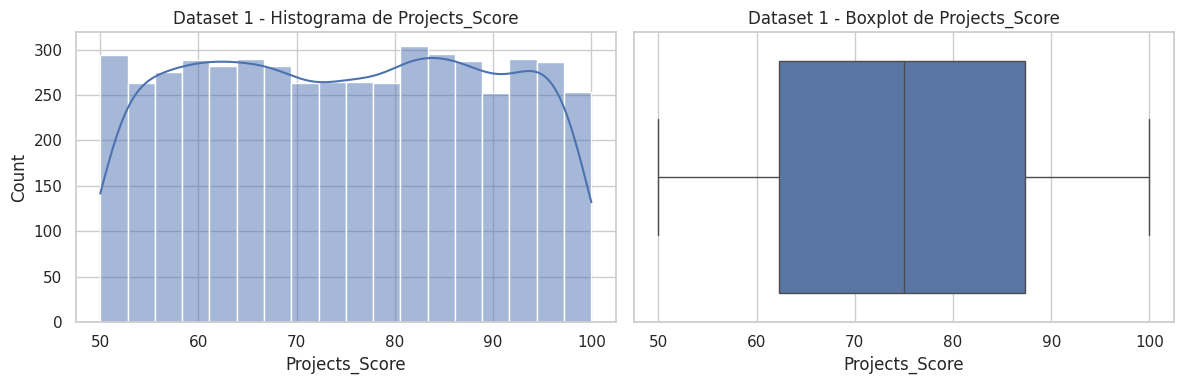

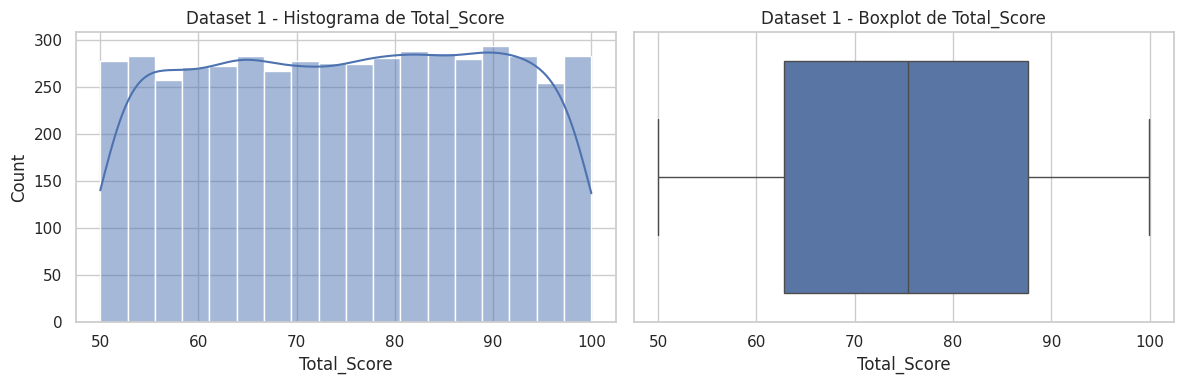

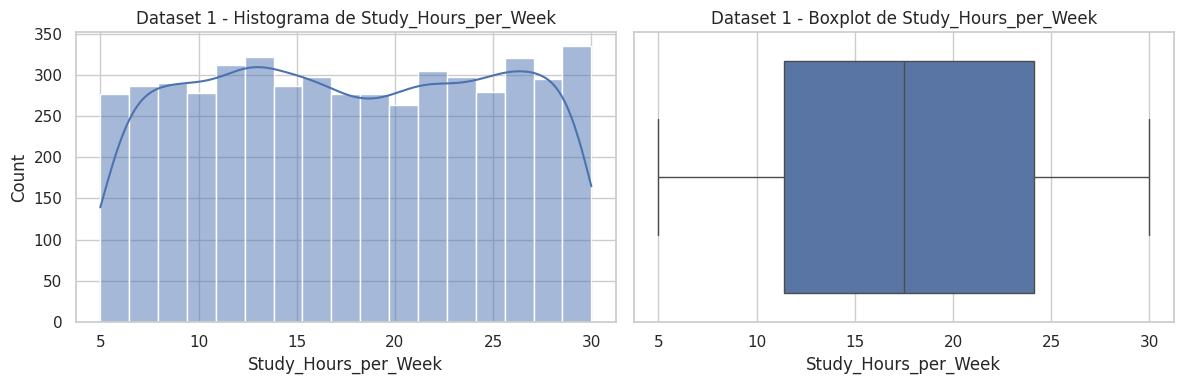

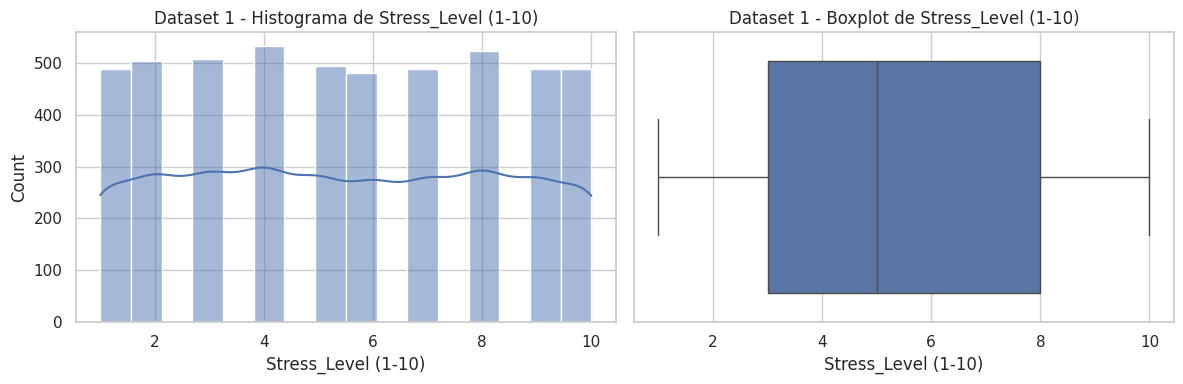

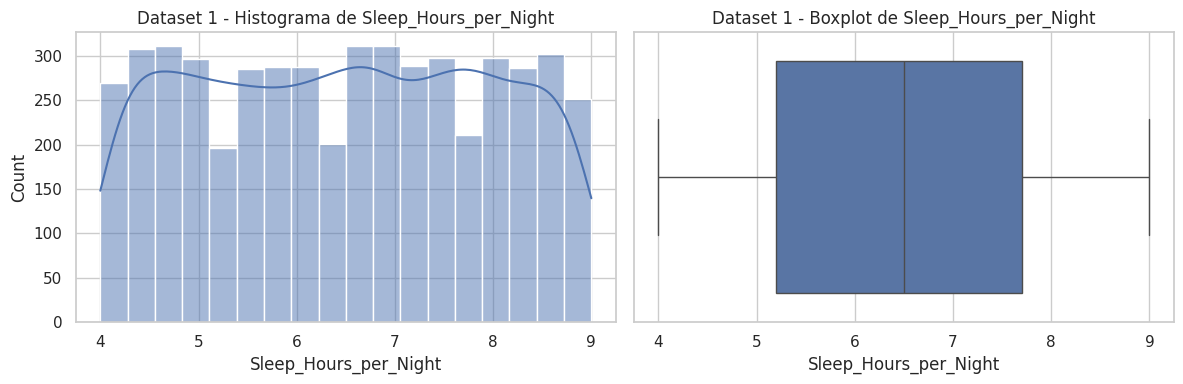

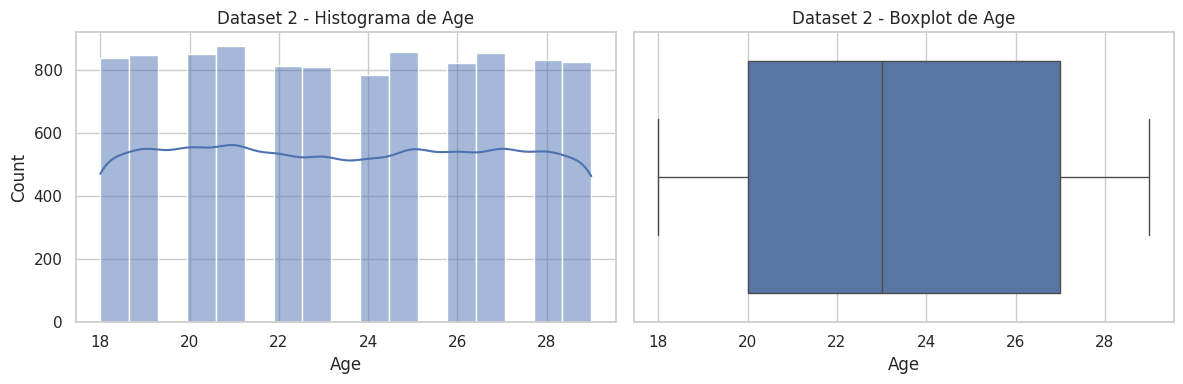

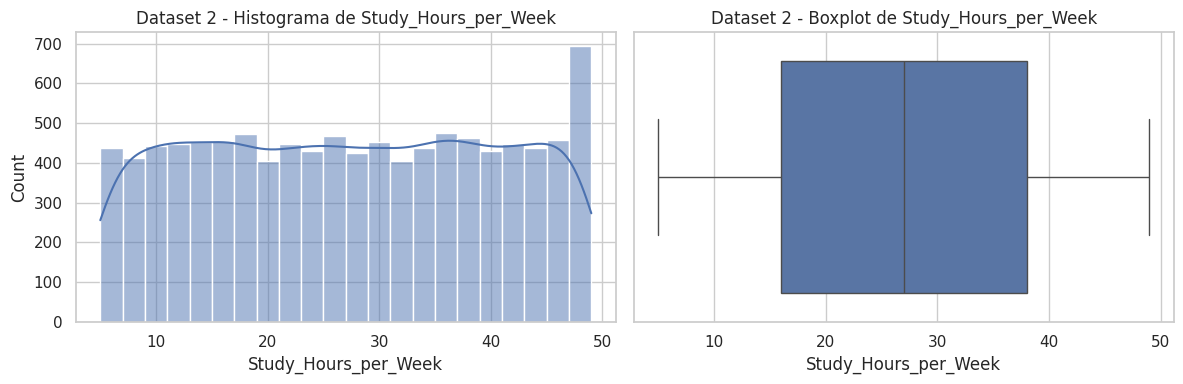

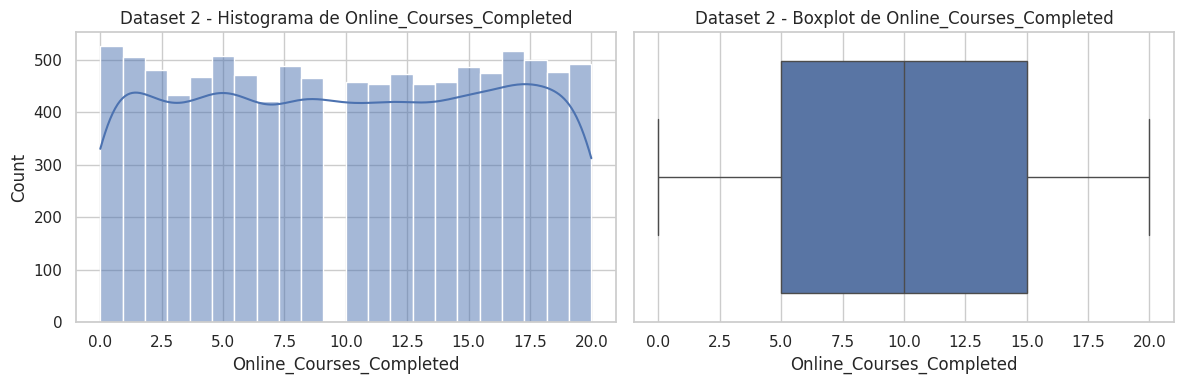

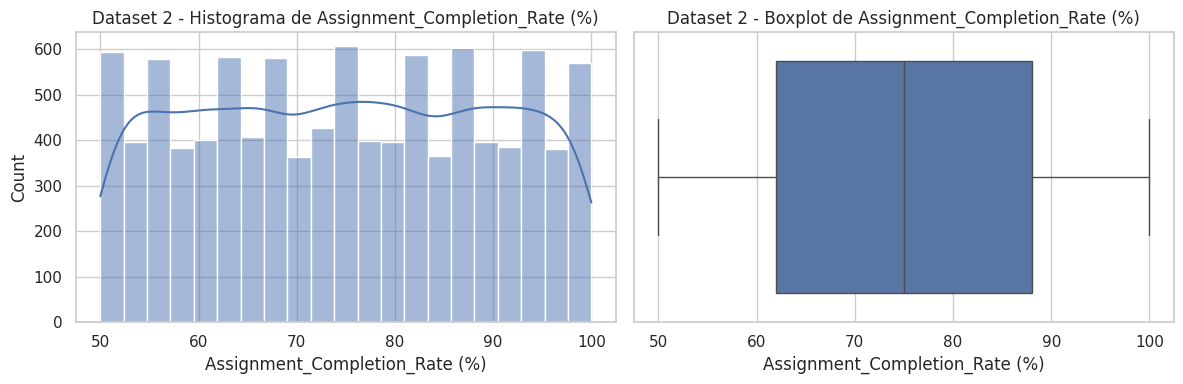

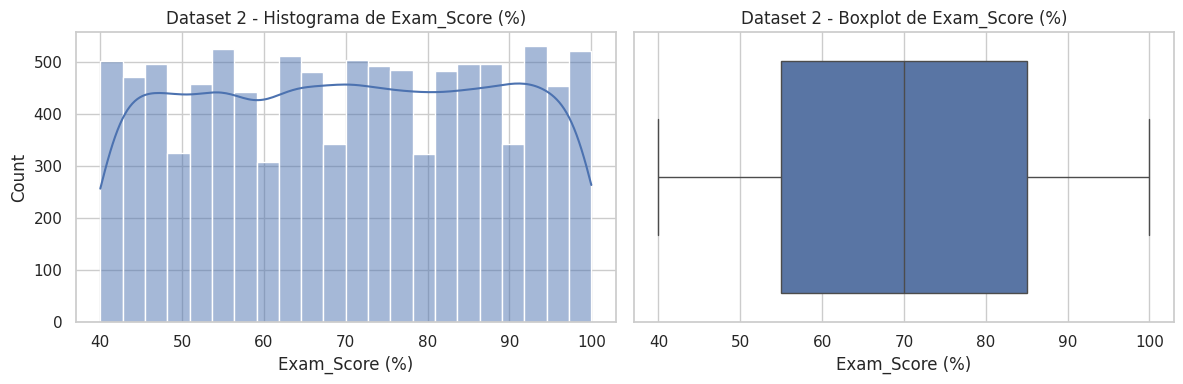

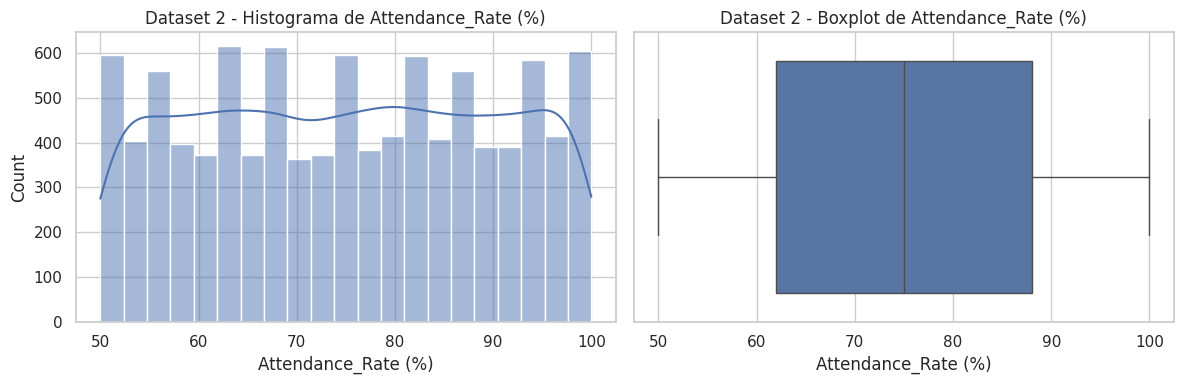

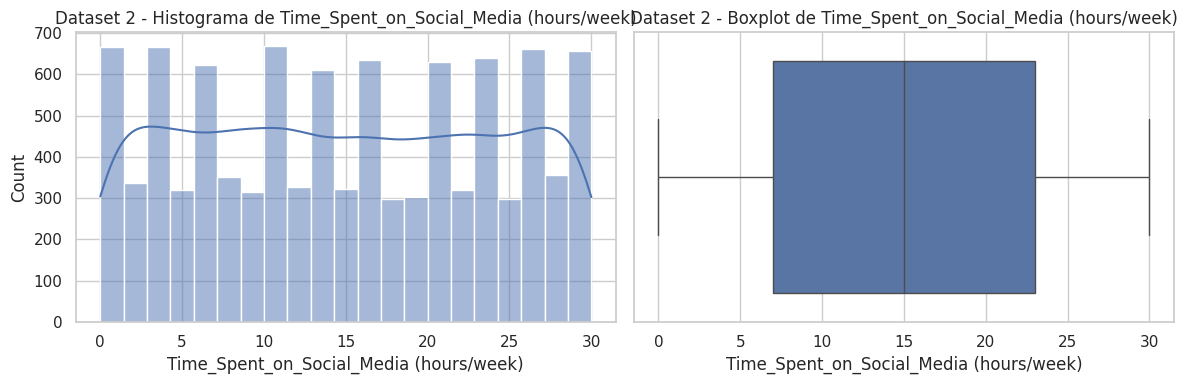

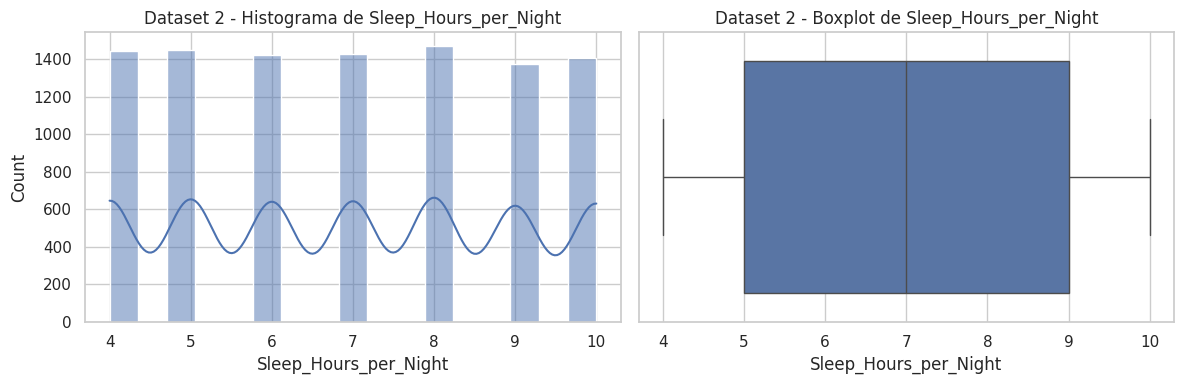

In [29]:
# Distribuição das Variáveis Numéricas
def plot_numeric_distributions(df, label):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,1)
        sns.histplot(df[col], kde=True)
        plt.title(f'{label} - Histograma de ' + col)
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col])
        plt.title(f'{label} - Boxplot de ' + col)
        plt.tight_layout()
        plt.show()

plot_numeric_distributions(df1, 'Dataset 1')
plot_numeric_distributions(df2, 'Dataset 2')

# 5.3 Análise das Variáveis Categóricas
Contamos quantas vezes cada categoria aparece em cada coluna do tipo 'object'.


Pulando coluna 'Student_ID' (muitas categorias: 5000).


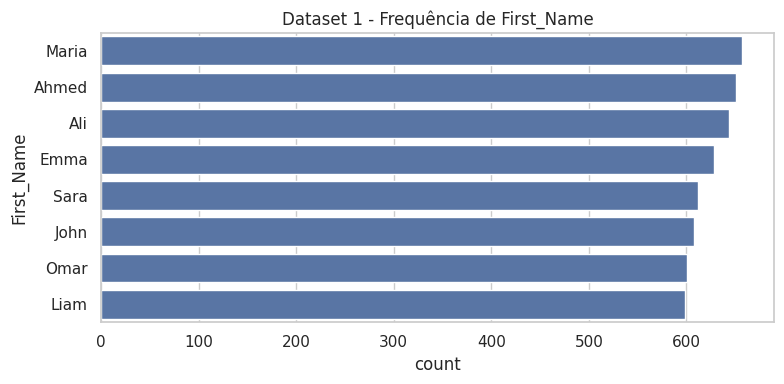

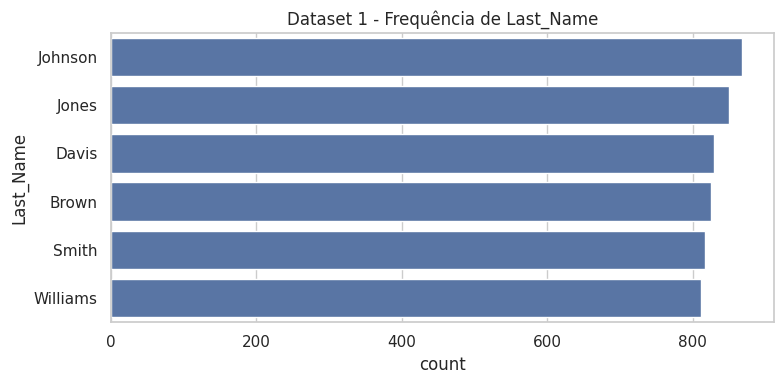

Pulando coluna 'Email' (muitas categorias: 5000).


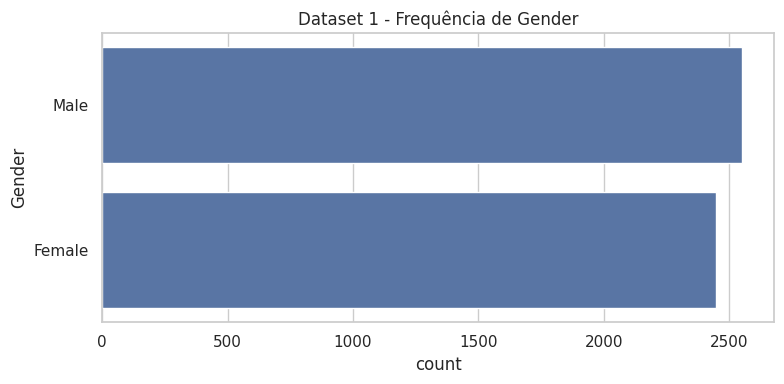

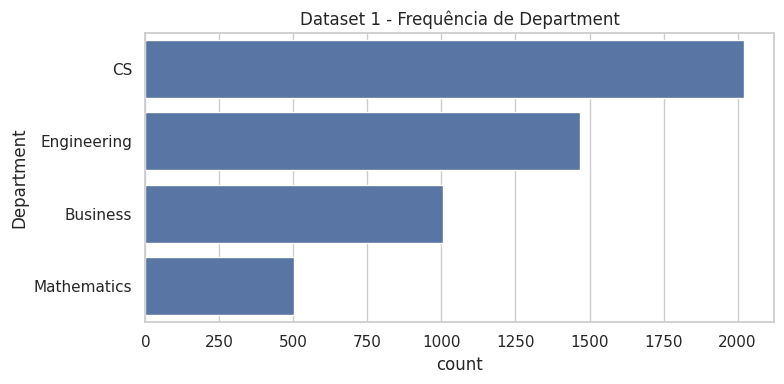

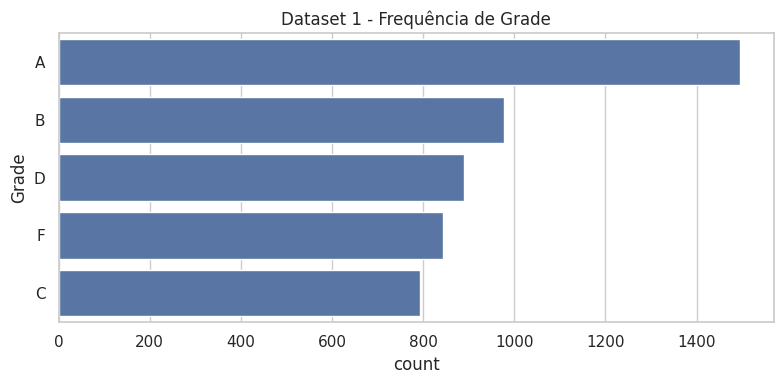

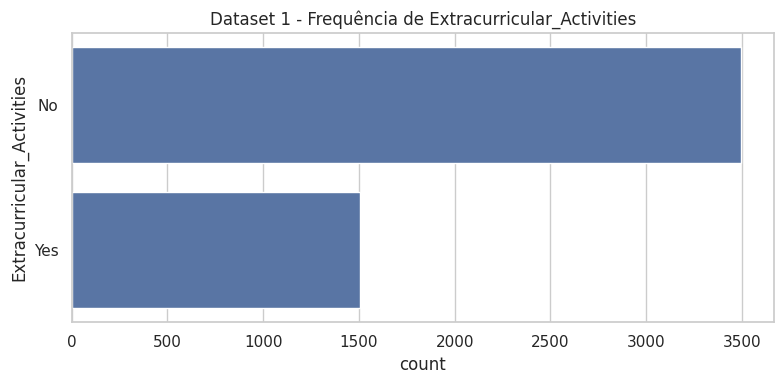

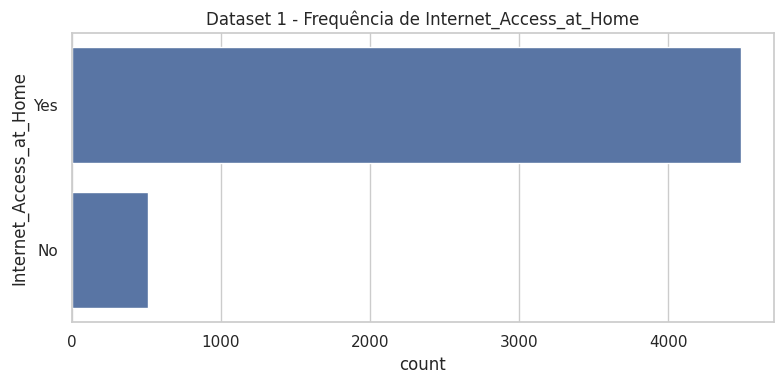

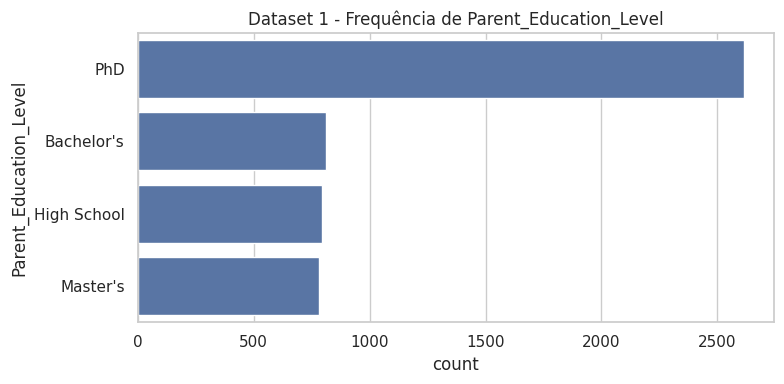

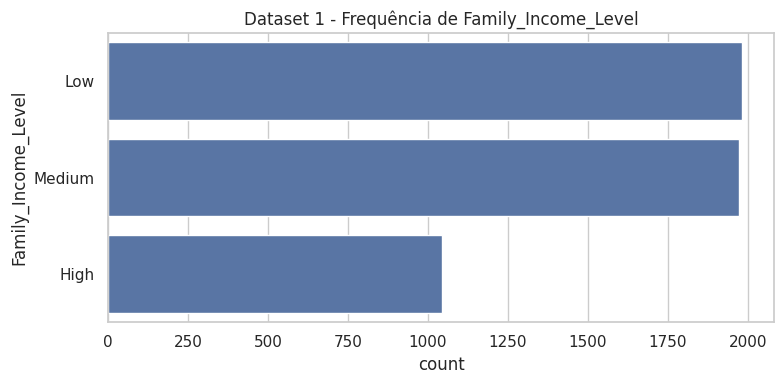

Pulando coluna 'Student_ID' (muitas categorias: 10000).


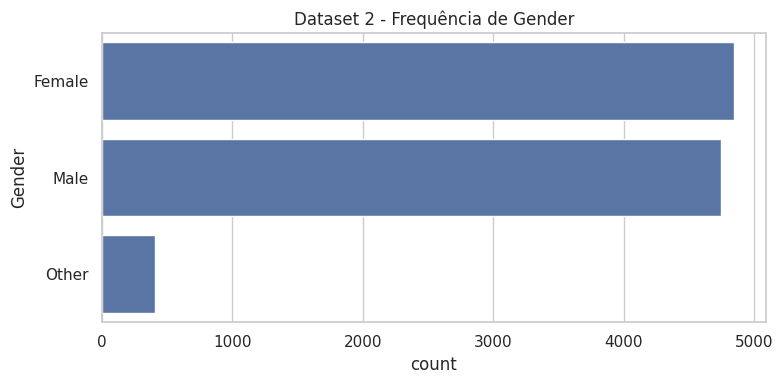

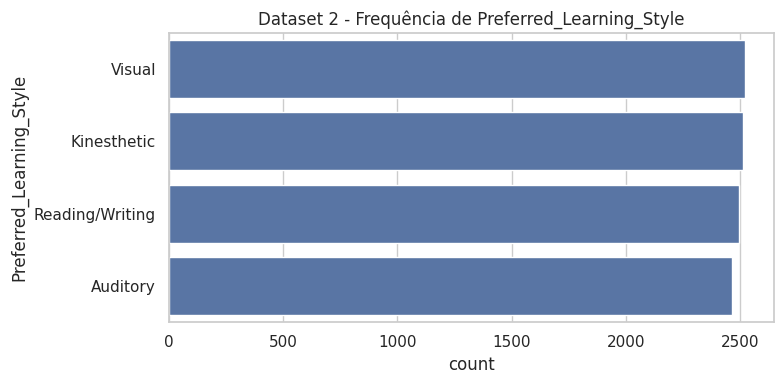

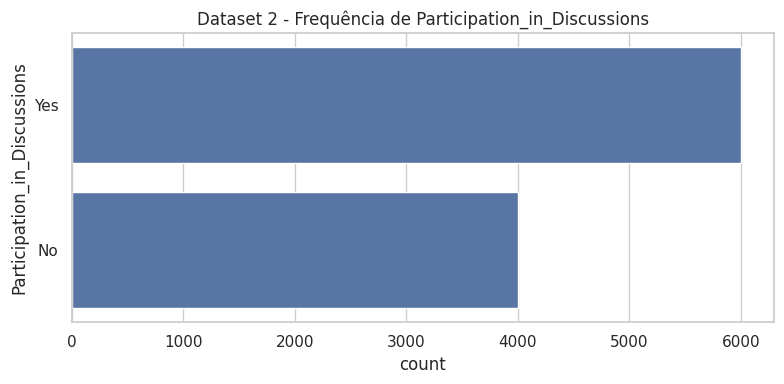

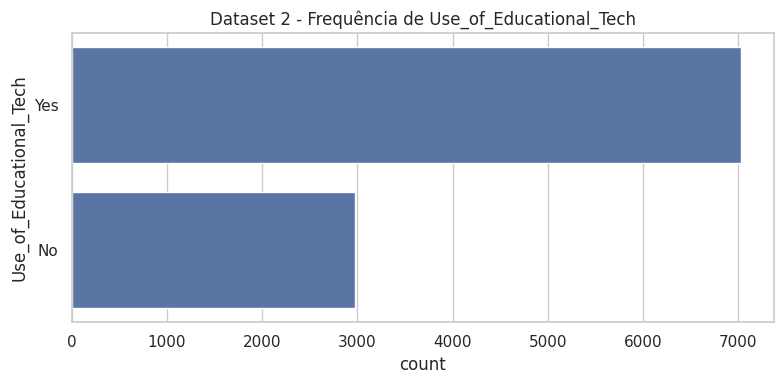

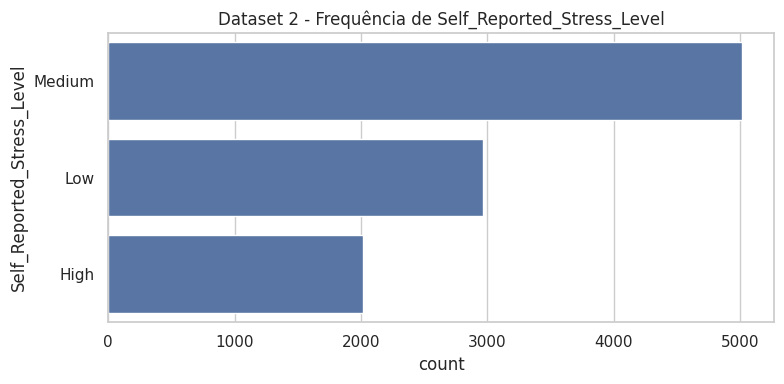

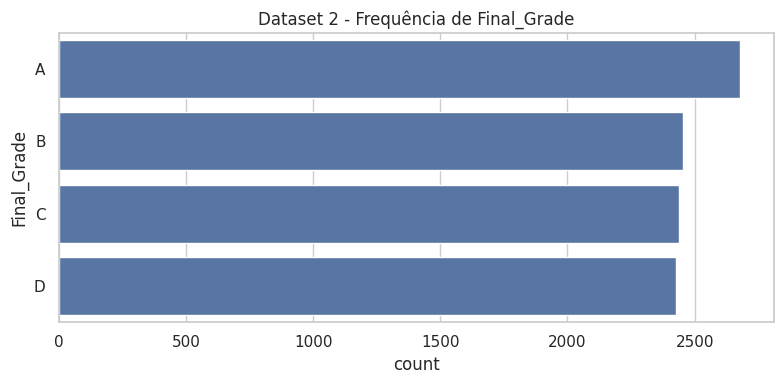

In [30]:
# Análise das Variáveis Categóricas
def plot_categorical_counts(df, label):
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        # Se a coluna tiver mais de 30 categorias únicas, pulamos o gráfico
        if df[col].nunique() > 30:
            print(f"Pulando coluna '{col}' (muitas categorias: {df[col].nunique()}).")
            continue

        plt.figure(figsize=(8,4))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f"{label} - Frequência de {col}")
        plt.tight_layout()
        plt.show()


plot_categorical_counts(df1, "Dataset 1")
plot_categorical_counts(df2, "Dataset 2")

# 5.4 Relação entre Variáveis de Interesse
Exemplos de scatter plots para observar possíveis correlações entre variáveis que façam sentido analisar juntas.

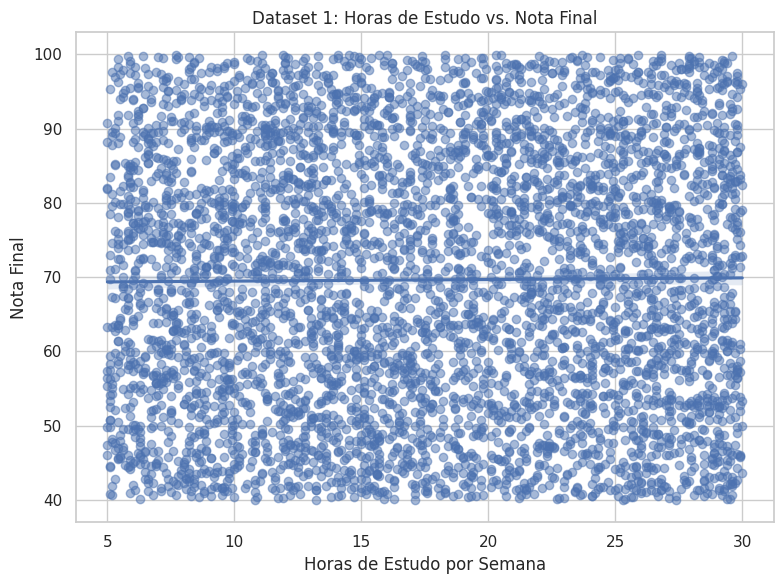

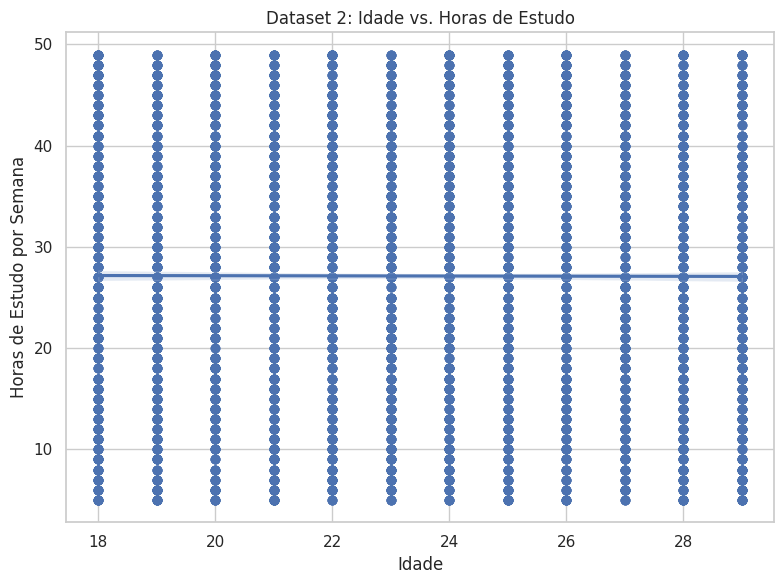

In [31]:
# Cria um gráfico de dispersão com linha de regressão para o Dataset 1
if 'Study_Hours_per_Week' in df1.columns and 'Final_Score' in df1.columns:
    plt.figure(figsize=(8,6))
    sns.regplot(x='Study_Hours_per_Week', y='Final_Score', data=df1, scatter_kws={'alpha':0.5})
    plt.title("Dataset 1: Horas de Estudo vs. Nota Final")
    plt.xlabel("Horas de Estudo por Semana")
    plt.ylabel("Nota Final")
    plt.tight_layout()
    plt.show()
else:
    print("Dataset 1: Colunas necessárias para o gráfico não existem.")

# Cria um gráfico de dispersão com linha de regressão para o Dataset 2
if 'Age' in df2.columns and 'Study_Hours_per_Week' in df2.columns:
    plt.figure(figsize=(8,6))
    sns.regplot(x='Age', y='Study_Hours_per_Week', data=df2, scatter_kws={'alpha':0.5})
    plt.title("Dataset 2: Idade vs. Horas de Estudo")
    plt.xlabel("Idade")
    plt.ylabel("Horas de Estudo por Semana")
    plt.tight_layout()
    plt.show()
else:
    print("Dataset 2: Colunas necessárias para o gráfico não existem.")


# 5.5 Conclusão da Análise Exploratória
Nesta etapa final, salvamos os dados tratados para uso posterior.
Também revisamos os gráficos e estatísticas para identificar ajustes futuros.


In [32]:
# Cria a pasta "resultados_analise"
if not os.path.exists("resultados_analise"):
    os.makedirs("resultados_analise")

# Salva todas as figuras geradas durante a análise
# Itera sobre todas as figuras abertas e as salva com um nome único
for i in plt.get_fignums():
    plt.figure(i)
    plt.savefig(f"resultados_analise/figura_{i}.png")
    plt.close()

# Salva os datasets tratados na pasta "resultados_analise"
df1.to_csv("resultados_analise/Student_Performance_Behavior_cleaned.csv", index=False)
df2.to_csv("resultados_analise/Student_Performance_LearningStyle_cleaned.csv", index=False)

print("Processo de EDA concluído. Resultados (figuras e datasets limpos) foram salvos na pasta 'resultados_analise'.")


Processo de EDA concluído. Resultados (figuras e datasets limpos) foram salvos na pasta 'resultados_analise'.


# Recapitulação do Objetivo e do Problema
O objetivo da análise exploratória foi investigar como o desempenho acadêmico dos estudantes se relaciona com seus hábitos de estudo, uso de tecnologia e estilo de aprendizagem. A proposta surgiu diante do desafio de entender as razões por trás do baixo desempenho de parte dos alunos, considerando o descompasso entre métodos de ensino tradicionais e o perfil digital da nova geração.

# Síntese dos Procedimentos e Métodos Utilizados
Trabalhamos com dois conjuntos de dados extraídos do Kaggle, que reúnem informações sobre comportamento, desempenho e estilo de aprendizado dos alunos. A análise começou com a importação e organização desses dados, seguida de um processo cuidadoso de limpeza: removemos duplicatas, tratamos valores ausentes e ajustamos os tipos de variáveis para garantir a consistência dos dados.
Com tudo pronto, partimos para a exploração dos dados, usando estatísticas descritivas e visualizações como:

- Histogramas e boxplots para examinar a distribuição das variáveis e detectar outliers;

- Mapas de calor (heatmaps) para verificar a força das correlações entre variáveis numéricas;

- Gráficos de dispersão para analisar possíveis relações, como entre horas de estudo e nota final.

# Resultados Obtidos
A análise mostrou que os dados estavam bem organizados, com poucas inconsistências ou valores extremos. No entanto, as relações entre comportamento dos alunos e desempenho não foram tão claras quanto esperado.

Alguns padrões chamaram atenção — como a concentração de desempenho em certos intervalos e o agrupamento de estudantes com frequência elevada. Esses indícios reforçam a ideia de que o sucesso acadêmico depende de uma combinação de fatores, não de um único hábito isolado.

# Avaliação dos Resultados
O ponto positivo é que os dados se mostraram confiáveis, coerentes e representativos da realidade analisada. No entanto, ficou evidente que as respostas não estão na superfície — os padrões são mais complexos e não se revelam por simples correlações.
Esse resultado só confirma a necessidade de adotarmos abordagens mais sofisticadas, como técnicas de inteligência artificial e modelos preditivos capazes de enxergar além do óbvio e identificar relações ocultas entre variáveis.


## Aplicando Ferramentas de IA para Aprimorar a Análise:

#7. Clustering K-Means
##Padroniza (⎼ z-score) todas as colunas numéricas de ambos os datasets, preparando-os para o agrupamento sem viés de escala.

Objetivo no projeto: formar grupos de alunos com perfis semelhantes (ex.: “eficiente”, “sob pressão” e “desgastado”), identificando segmentos para intervenções pedagógicas direcionadas.

In [33]:
# Padronização dos Dados
from sklearn.preprocessing import StandardScaler

# Selecionar apenas colunas numéricas
num_cols_df1 = df1.select_dtypes(include='number').columns
num_cols_df2 = df2.select_dtypes(include='number').columns

# Padronização dos dados
scaler = StandardScaler()

data_scaled_df1 = scaler.fit_transform(df1[num_cols_df1])
data_scaled_df2 = scaler.fit_transform(df2[num_cols_df2])


# 8. Método do Cotovelo
##Testa k de 2 a 9 clusters, calcula a soma dos erros quadrados (SSE) para cada k e plota o gráfico do “cotovelo”.

determinar visualmente o número ideal de clusters (ponto de inflexão) antes de aplicar o K-Means de forma robusta.


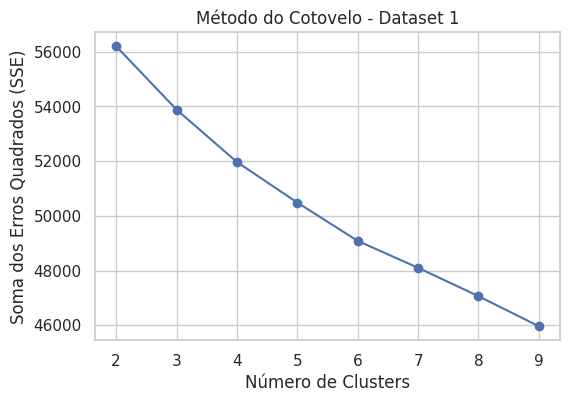

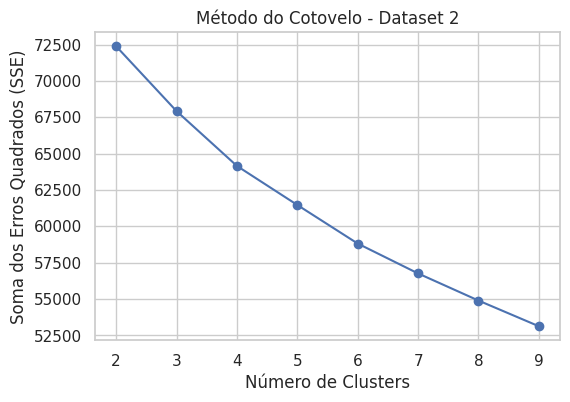

In [34]:
# Para Dataset 1
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df1)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, sse, marker='o')
plt.title('Método do Cotovelo - Dataset 1')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Erros Quadrados (SSE)')
plt.show()

# Para Dataset 2
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df2)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, sse, marker='o')
plt.title('Método do Cotovelo - Dataset 2')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Erros Quadrados (SSE)')
plt.show()


# 9. Silhouette Score – Validação
##Para o k sugerido pelo cotovelo, calcula o coeficiente de Silhouette que mede o quão bem cada ponto está agrupado.

Objetivo no projeto: confirmar quantitativamente que o número de clusters escolhido (k=3) produz grupos coesos e bem separados.

In [35]:
from sklearn.metrics import silhouette_score

k_df1 = 3  # Substituir pelo melhor K escolhido
kmeans_df1 = KMeans(n_clusters=k_df1, random_state=42)
labels_df1 = kmeans_df1.fit_predict(data_scaled_df1)

silhouette = silhouette_score(data_scaled_df1, labels_df1)
print(f'Silhouette Score (Dataset 1) para k={k_df1}: {silhouette:.3f}')


k_df2 = 3  # Substituir pelo melhor K escolhido
kmeans_df2 = KMeans(n_clusters=k_df2, random_state=42)
labels_df2 = kmeans_df2.fit_predict(data_scaled_df2)

silhouette = silhouette_score(data_scaled_df2, labels_df2)
print(f'Silhouette Score (Dataset 2) para k={k_df2}: {silhouette:.3f}')



Silhouette Score (Dataset 1) para k=3: 0.054
Silhouette Score (Dataset 2) para k=3: 0.081


# 10. Aplicar KMeans e Adicionar Labels aos DataFrames

##Executa K-Means com k=3, salva os rótulos em df['Cluster'] e exibe a contagem e as médias das variáveis por cluster.

Objetivo no projeto: atribuir a cada aluno o perfil identificado e quantificar as características médias de cada grupo, facilitando a descrição e comparação dos perfis de estudante.

In [36]:
df1['Cluster'] = labels_df1

# Contagem por cluster
print(df1['Cluster'].value_counts())

# Média dos clusters (somente numéricas)
display(df1.groupby('Cluster')[num_cols_df1].mean())



df2['Cluster'] = labels_df2

# Contagem por cluster
print(df2['Cluster'].value_counts())

# Média dos clusters (somente numéricas)
display(df2.groupby('Cluster')[num_cols_df2].mean())




Cluster
0    1766
2    1677
1    1557
Name: count, dtype: int64


,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
Cluster,,,,,,,,,,,,
0,20.749151,70.545346,69.314740,70.295294,78.078734,75.454247,5.048182,74.524728,76.021597,17.546716,5.603624,7.913307
1,19.382145,76.881309,69.474464,70.633475,74.963892,74.533757,5.083873,73.038459,73.794348,18.184136,5.637123,5.444188
2,22.910555,79.230631,72.184049,68.029893,71.191139,74.688360,4.811831,77.097645,75.406726,17.289267,5.206321,5.956589


Cluster
0    3769
1    3134
2    3097
Name: count, dtype: int64


,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
Cluster,,,,,,,,
0,23.419475,26.797824,9.638631,74.268506,68.987795,75.908198,5.622977,7.156540
1,23.356094,26.420868,10.141353,74.803127,72.897575,74.754308,19.908105,5.037652
2,23.675170,28.252825,10.322247,75.837585,68.909590,74.418147,21.239910,8.728447


#Modelagem para geração de Texto com API Gemini

Objetivo no projeto:
Preparar um resumo estruturado dos perfis de aluno (clusters) com estatísticas médias, de forma a alimentar o modelo de linguagem (API Gemini). Esses dicionários servem como input do prompt para gerar automaticamente descrições textuais claras e padronizadas dos perfis encontrados, acelerando a interpretação e documentação dos resultados.

In [37]:
#Gerar o Dicionário Resumo dos Clusters

# Selecionar apenas colunas numéricas
num_cols_df1 = df1.select_dtypes(include='number').columns
num_cols_df2 = df2.select_dtypes(include='number').columns

# Gerar o dicionário resumo dos clusters
summary_df1 = df1.groupby('Cluster')[num_cols_df1].mean().round(2).to_dict()
summary_df2 = df2.groupby('Cluster')[num_cols_df2].mean().round(2).to_dict()

print(summary_df1)
print(summary_df2)


{'Age': {0: 20.75, 1: 19.38, 2: 22.91}, 'Attendance (%)': {0: 70.55, 1: 76.88, 2: 79.23}, 'Midterm_Score': {0: 69.31, 1: 69.47, 2: 72.18}, 'Final_Score': {0: 70.3, 1: 70.63, 2: 68.03}, 'Assignments_Avg': {0: 78.08, 1: 74.96, 2: 71.19}, 'Quizzes_Avg': {0: 75.45, 1: 74.53, 2: 74.69}, 'Participation_Score': {0: 5.05, 1: 5.08, 2: 4.81}, 'Projects_Score': {0: 74.52, 1: 73.04, 2: 77.1}, 'Total_Score': {0: 76.02, 1: 73.79, 2: 75.41}, 'Study_Hours_per_Week': {0: 17.55, 1: 18.18, 2: 17.29}, 'Stress_Level (1-10)': {0: 5.6, 1: 5.64, 2: 5.21}, 'Sleep_Hours_per_Night': {0: 7.91, 1: 5.44, 2: 5.96}, 'Cluster': {0: 0.0, 1: 1.0, 2: 2.0}}
{'Age': {0: 23.42, 1: 23.36, 2: 23.68}, 'Study_Hours_per_Week': {0: 26.8, 1: 26.42, 2: 28.25}, 'Online_Courses_Completed': {0: 9.64, 1: 10.14, 2: 10.32}, 'Assignment_Completion_Rate (%)': {0: 74.27, 1: 74.8, 2: 75.84}, 'Exam_Score (%)': {0: 68.99, 1: 72.9, 2: 68.91}, 'Attendance_Rate (%)': {0: 75.91, 1: 74.75, 2: 74.42}, 'Time_Spent_on_Social_Media (hours/week)': {0: 5

## Prompt para IA

Considere os seguintes perfis de estudantes baseados no agrupamento dos dados:

summary_df1:


{'Age': {0: 20.75, 1: 19.38, 2: 22.91}, 'Attendance (%)': {0: 70.55, 1: 76.88, 2: 79.23}, 'Midterm_Score': {0: 69.31, 1: 69.47, 2: 72.18}, 'Final_Score': {0: 70.3, 1: 70.63, 2: 68.03}, 'Assignments_Avg': {0: 78.08, 1: 74.96, 2: 71.19}, 'Quizzes_Avg': {0: 75.45, 1: 74.53, 2: 74.69}, 'Participation_Score': {0: 5.05, 1: 5.08, 2: 4.81}, 'Projects_Score': {0: 74.52, 1: 73.04, 2: 77.1}, 'Total_Score': {0: 76.02, 1: 73.79, 2: 75.41}, 'Study_Hours_per_Week': {0: 17.55, 1: 18.18, 2: 17.29}, 'Stress_Level (1-10)': {0: 5.6, 1: 5.64, 2: 5.21}, 'Sleep_Hours_per_Night': {0: 7.91, 1: 5.44, 2: 5.96}, 'Cluster': {0: 0.0, 1: 1.0, 2: 2.0}}


summary_df2:


{'Age': {0: 23.42, 1: 23.36, 2: 23.68}, 'Study_Hours_per_Week': {0: 26.8, 1: 26.42, 2: 28.25}, 'Online_Courses_Completed': {0: 9.64, 1: 10.14, 2: 10.32}, 'Assignment_Completion_Rate (%)': {0: 74.27, 1: 74.8, 2: 75.84}, 'Exam_Score (%)': {0: 68.99, 1: 72.9, 2: 68.91}, 'Attendance_Rate (%)': {0: 75.91, 1: 74.75, 2: 74.42}, 'Time_Spent_on_Social_Media (hours/week)': {0: 5.62, 1: 19.91, 2: 21.24}, 'Sleep_Hours_per_Night': {0: 7.16, 1: 5.04, 2: 8.73}, 'Cluster': {0: 0.0, 1: 1.0, 2: 2.0}}

Cada cluster representa um grupo com características médias nas variáveis acima.
Gere um texto descritivo para cada grupo, destacando os perfis encontrados como, por exemplo, 'estudante eficiente', 'sob pressão', 'desengajado' e outros padrões possíveis



# Resultados dos Cluesters:



#Cluster 0 – "O Estudante Eficiente e Equilibrado"
- Idade: ~20,75 (perfil mais jovem no dataset 1 e ~23,4 no dataset 2)

- Frequência: 70,55% (média, mas não baixa)

#Desempenho acadêmico:

- Notas: Médio-altas (Midterm 69,31 | Final 70,3 | Total 76,02)

- Projetos: 74,52

- Trabalhos: 78,08 (melhor média entre os grupos do summary_df1)

- Quizzes: 75,45

- Participação: 5,05 (estável)

- Horas de estudo: 17,55 horas/semana (moderado)

- Estresse: 5,6 (moderado)

- Sono: 7,91 horas/noite (mais alto entre os grupos do summary_df1)

- Engajamento digital: 5,62 horas/redes sociais por semana (baixo)

- Cursos online concluídos: 9,64 (alta capacitação complementar)

#Resumo do Perfil:
Este grupo representa estudantes equilibrados e eficientes, que mantêm uma boa média acadêmica, conciliam sono adequado e baixo uso de redes sociais. Estão focados, mas sem excesso de estresse. Costumam ser organizados e priorizam produtividade sobre dispersões digitais.

# Cluster 1 – "O Estudante Sob Pressão e Distraído"
- Idade: ~19,38 (mais jovem no summary_df1 e ~23,36 no summary_df2)

- Frequência: 76,88% (a mais alta dos três grupos)

# Desempenho acadêmico:

- Notas: Médias (Midterm 69,47 | Final 70,63 | Total 73,79)

- Projetos: 73,04

- Trabalhos: 74,96

- Quizzes: 74,53

- Participação: 5,08 (estável)

- Horas de estudo: 18,18 horas/semana (ligeiramente mais que os outros)

- Estresse: 5,64 (mais alto dos três, embora levemente)

- Sono: 5,44 horas/noite (o menor no summary_df1 e summary_df2)

- Engajamento digital: 19,91 horas/redes sociais por semana (muito alto)

- Cursos online concluídos: 10,14 (maior que o Cluster 0)

- Desempenho em exames: 72,9 (o mais alto no summary_df2)

#Resumo do Perfil:
Este grupo corresponde a estudantes sob pressão e altamente distraídos. Eles têm boa frequência e bom desempenho em exames, porém sacrificam o sono e são extremamente ativos nas redes sociais. Apesar do uso intenso de mídias, conseguem manter desempenho razoável, indicando possível sobrecarga e risco de esgotamento.

#Cluster 2 – "O Estudante Solitário, Altamente Focado, mas Desgastado"
- Idade: ~22,91 (summary_df1) e ~23,68 (summary_df2) – mais velho dos grupos

- Frequência: 79,23% (a mais alta do summary_df1)

# Desempenho acadêmico:

- Notas: Midterm 72,18 (melhor nota) | Final 68,03 (queda) | Total 75,41

- Projetos: 77,1 (melhor desempenho)

- Trabalhos: 71,19 (menor dos três)

- Quizzes: 74,69

- Participação: 4,81 (menor dos três, possível menor interação social)

- Horas de estudo: 17,29 horas/semana (levemente abaixo dos outros)

- Estresse: 5,21 (menor estresse relatado)

- Sono: 5,96 horas/noite (ainda baixo, mas melhor que o Cluster 1)

- Engajamento digital: 21,24 horas/redes sociais por semana (mais alto dos três)

- Cursos online concluídos: 10,32 (o maior número)

- Desempenho em exames: 68,91 (baixo no summary_df2)

# Resumo do Perfil:
Perfil de estudantes altamente focados em atividades práticas (projetos, cursos online), mas que apresentam desequilíbrios: baixa interação social (menor participação), sono insuficiente e grande dependência de redes sociais. Têm desempenho misto — excelente em projetos, mas queda em provas finais —, indicando possível dificuldade com avaliações formais ou cansaço acumulado.

# Conclusão do Projeto:

## Resultados Parte 1 (Análise Exploratória)
Objetivo & Problema: Investigar como desempenho acadêmico se relaciona a hábitos de estudo, uso de tecnologia e estilo de aprendizagem, diante do descompasso entre métodos tradicionais e perfil digital dos alunos.

##Procedimentos:

- Carregamos dois datasets do Kaggle (5 000 e 10 000 registros).

- Limpamos os dados: removemos duplicatas, imputamos valores faltantes (média e moda) e ajustamos tipos numéricos.

- Realizamos EDA: estatísticas descritivas, histogramas, boxplots, mapas de calor de correlação e scatter plots (ex.: horas de estudo vs. nota final).

##Principais Achados:

- Dados coerentes, sem inconsistências graves ou valores extremos.

- Distribuições de notas centradas em faixas médias (nota final ~70/100; presença mediana ~80%).

- Correlação quase nula entre variáveis comportamentais (horas de estudo, uso de redes sociais, estresse, sono) e desempenho.

- Indícios de agrupamento natural de estudantes por frequência e desempenho, mas padrões complexos — nenhum único fator explica o sucesso acadêmico.

#Resultados Parte 2 (Clustering + IA Generativa)
Clustering K-Means:

- Padronizamos as variáveis numéricas.

- Escolhemos k = 3 (Método do Cotovelo + Silhouette ≈0,05).

- Geramos rótulos e calculamos médias por cluster.

##Perfis Identificados:

###Cluster 0 – “Estudante Eficiente e Equilibrado”

Idade: ~20–23 anos

Frequência: ~70%

Notas médias-altas, horas de estudo e sono adequados, baixo uso de redes sociais.

###Cluster 1 – “Estudante Sob Pressão e Distraído”

Idade: ~19–23 anos

Frequência: ~77%

Notas médias, muitas horas de estudo, sono reduzido, uso intenso de redes sociais.

###Cluster 2 – “Estudante Altamente Focado, mas Desgastado”

Idade: ~23–24 anos

Frequência: ~79%

Excelentes em projetos e cursos online, mas queda nas provas finais, participação menor e sono insuficiente.

# Aplicação da IA Generativa (API Gemini):

Resumimos as médias de cada cluster em dicionário.

A API produziu descrições iniciais dos perfis.

Revisamos e ajustamos os textos para clareza e precisão.